## Using networkx

For this notebook you should execute the first cell before going on to explore the
others.  Uncomment out `%matplotlib inline` if you want all your graphs to appear in the notebook and not in a separate window.  If you choose to have them in a separate window, be aware that if didn't start the notebook with the `--pylab` flag, you will have to execute `plt.show()` to get the graphs to appear on your screen, even after having given a `draw` command.

Some of the graph used in this notebook or usable using the code in this notebook include: [homer.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml)
[anna.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/anna.gml)
[lesmiserables.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/lesmiserables.gml)
[polblogs.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/polblogs.gml) 
[an anonymized ego network, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/personal_ego_network_anon.gml) 
[dolphins-newman-2003.gml, ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/dolphins-newman-2003.gml) and
[FauxMesaHigh.gml. ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/FauxMesaHigh.gml)



All of these graphs can be loaded into Python using the `url_fetch_network_graph` function defined in this notebook together with the urls linked to in the previous paragraph (look at the raw markup by double-clicking on this cell).

```
url22 = 'http://gawron.sdsu.edu/python_for_ss/course_core/assignments/homer.gml'
hg = url_fetch_networkx_graph (url22)
```

After executing this code `hg` is a networkx graph instance showing the connectedness of the characters in Homer (connected means occurring in the same scene).  For those interested in network projects, have a look at [Mark Newman's networks page](http://www-personal.umich.edu/~mejn/netdata/) for more examples.

The "Homer" graph consists of characters from *The Iliad*.  The "Anna" graph maps the characters from *Anna Karenina* (discussion below), and "Les Miserables" maps characters from the Victor Hugo novel *Les Miserables*.  For background on the polblogs (political blogs) data, see 
[Adamic and Glance (2005). ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/AdamicGlanceBlogWWW.pdf) 
For background on the dolphin graph, see 
[Lusseau and Newman (2004). ](http://gawron.sdsu.edu/python_for_ss/course_core/assignments/lusseau_newman_identifying_role_animals_play_04.pdf) For more on the Faux Mesa High School graph, see
[Goodreau's Faux Mesa High School dataset description. ](http://www.casos.cs.cmu.edu/tools/computational_tools/datasets/external/Goodreau/index11.php)

In [1]:
#%matplotlib inline
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

In [15]:
len(ff)

15

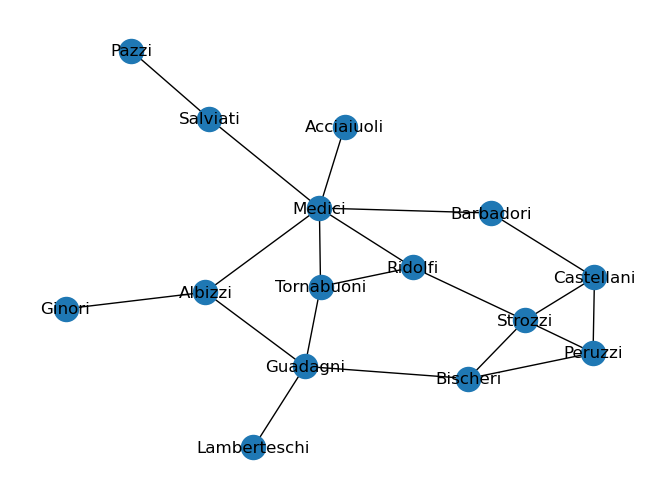

In [14]:
nx.draw(ff,with_labels=True)

In [ ]:
nx.__version__

If you want to have your graphs appear in the matplotlib graph GUI,
then comment
out the matplotlib inline command above and replace it with

```
%pylab inline
```

If you do that, 
then they won't appear inline as they do in the distributed version
of the notebook.  

#### First Example:  Zachary's Karate Club Graph

Let's read in the karate network from

> Zachary, W. W. 1977. "An information flow model for conflict and fission in small groups." Journal of anthropological research, 452-473.

We'll be reading in the builtin `networkx` version of the karate graph, rather than any version you might find distributed on the web. The key advantage of this version is that it has node attributes identifying what faction each  member belongs to, and edge attrbutes identifying the strength of relationships. Both will be important in 
analyzing the graph.

In [ ]:
kn = nx.karate_club_graph()

`kn` is a `networkx` graph.

In [ ]:
kn

A `networkx Graph` is a container.  It has a length and supports the `in` test.

In [ ]:
len(kn)

In [ ]:
3 in kn

The `True` here reflects the fact that there is a node in `kn` whose name is 3.

`kn` can be also **iterated** through like any container (all containers
are iterables). So we can print the 34 members of the karate club as follows:

In [ ]:
for n in kn:
    print(n)

Let's draw the graph to get a birdseye view of the data.

For drawing, we'll try a force spring layout algorithm.

In [ ]:
# Draw choosing  a force-spring algorithm
nx.draw_spring(kn)
# Use the default drawing program.
#nx.draw_networkx(kn)
# Saving the figure to a file (works only after drawing it)
#plt.savefig('networkx_spring_karate.png')

In [ ]:
# Different layout algorithm, and we'll throw a new node color and labels in too.
nx.draw_circular(kn,with_labels=True,font_size=9, node_color='cyan')
#plt.savefig('networkx_circular_karate.png')

In [ ]:
# This layout suffers from node overlap, making labels unfeasible 
# Shrinking node circles to help
nx.draw_spectral(kn,node_size=125)
#plt.savefig('networkx_spectral_karate.png')

#### Graphs as Dictionaries

Graphs in `networkx` are **dictionary-like**.

By this I mean that we can treat the graph `kn` as a dictionary whose keys are the nodes of `kn`;

In [ ]:
kn[0]

returns another dictionary-like object, which we'll just call a dictionary for now,
since it has keys and values like a dictionary, and values can be looked up using the 
get-item-syntax Python uses for dictionaries.

The keys of the *dictionary* `kn[0]` are the neighbors of node `0`.  So
the fact that `kn[0]` has 1 as one of its keys means that
there is an edge between 0 and 1 in the graph.

You'll notice that the values of the `kn[0]` dictionary are themselves dictionaries. For example,

`kn[0][1]`

is the **attribute dictionary** for the edge (0,1).

In [ ]:
kn[0][1]

Note that all 
the edges have a **weight attribute**.  These weights are taken from Zachary's paper and 
quantify the intensity of the relationship, 
measured by frequency with which the two club members see each other outside club
activities, based on Zachary's interviews.  So above we see that member 0's relationship with member 2 is
more intense than any of 1's other relationships with club members.  We'll return to this edge
attribute later on this notebook.

We look up the weight of a relationship as follows

In [ ]:
kn[0][2]['weight']

Now this is an undirected graph, so of course it has to be the case that:

In [ ]:
kn[2][0]['weight']

This is not a claim about whether friendship intensity has to be the same in both directions.

Rather, it's down to the fact that we are representing the karate club
as undirected graph, and in an undirected graph the edge from 0 to 2 is the same edge
as the edge from 2 to 0.  Therefore the the edge attributes must be represented by
one and the same dictionary:

In [ ]:
kn[0][2] is kn[2][0]

Notice I didn't use `==` here.  I'm interested in whether the two expressions
`kn[0][2]` and `kn[2][0]` denote the same object in memory (the meaning of `is`)
And they do. If I were interested in whether
they contain the same information, I would use `==`. 

When you reflect on how Zachary measures intensity (frequency of interaction), it seems correct 
that the intensity must be the same for the pair (0,2) and the pair (2,0), and
that supports the decision to treat the club as an undirected graph.

Now suppose we wanted to color edges and that we want to assign the color red to the edge from 0 to 1.  Then we could add another attribute 
to the following edge attribute dictionary:

In [ ]:
kn[0][1]

In [ ]:
kn[0][1]['color'] = 'red'

And  when we look at it now

In [ ]:
kn[0][1]

In [ ]:
kn[1][0]

#### Customizing  Drawing I:  The four stages of drawing a graph.

Adding some customization to the drawing.
We'll display the edge coloring we just added and
we will illustrate some important concepts
for drawing networkx objects.

The most important concept is that
most customizations will require breaking down 
the drawing into stages: compute layout, draw nodes, draw labels,
draw edges.  And of course the last three steps all depend on the layout,
which must be done first.

Spelling this out: everything we did in
one function call to `nx.draw()` above
can be broken down into these four stages:

  1.  Compute the basic layout.  This creates a layout object we'll call `pos`,  used in the next steps
  2.  Draw the node labels  for `pos`(optional)
  3.  Draw the nodes for `pos`, possibly with coloring, and possibly with special outlining
  4.  Draw the edges for `pos`, connecting the nodes.
  
These correspond to the following functions:

  ```
  nx.spring_layout (there are alternative layout functions; this is the default)
  nx.draw_networkx_labels
  nx.draw_networkx_nodes
  nx.draw_networkx edges
  ```


Almost all complex graphs will benefit from some kind of customization when drawing them.  For example, the layout algorithm does not take labeling into account, so that adding labels to a graph may result in a cluttered, even unreadable, graph.  You can deal with this by leaving some nodes out, or by leaving some edges out, adjusting label size and position, or by factoring some of the information into coloring.  In all cases you need to break the drawing process up into component steps, which allows you to customize some or all of them. 

We illustrate with a fairly sinple example. We expand on that
ion the next example.  We use thse concepts throughout
the notebook to introduce more and more flexibility 
into our network visualizations.

In [ ]:
############# Stage 1 alyout ##################################

#  This returns a layout object we can reuse in future commands/drawings.
#  Fixing seed allows us to reproduce a particular layout in future runs.
seed = 47
pos=nx.spring_layout(kn,seed=seed)


############# Stage 2 Nodes ##################################
ncoll = nx.draw_networkx_nodes(kn, pos, node_color='cyan')
#Add Node outlines.  No keyword arg for this.  Whine to networkx folks
ncoll.set_edgecolor('k')

############# Stage 3 Labels ##################################
# Labels must be a dict(): node_id -> label
labels= {i:i for  i in range(len(kn))}
nx.draw_networkx_labels(kn, pos, labels=labels,font_size=9)

############# Edges ##################################
default_edge_color='aqua'
# To understand the next lines better, do
# print(kn.edges.__doc__)
# This is a way to collect values for a SINGLE edge attribute (the kn graph has 2: weight and color)
# providing a default, and using the same ordering stored in kn.edges()
EVcol_data = kn.edges(data="color", default=default_edge_color)
edge_colors= [col for (i,j,col) in EVcol_data]
nx.draw_networkx_edges(kn, pos, edge_color=edge_colors)

# The above is approximated with the following, 
# which necessarily allows fewer customizations (viz. layout, edge colots,  node outlines)
# nx.draw_spring(kn,labels=labels,edge_color=edge_colors,node_color='cyan',font_size=9)

## Node data

In  the examples above we looked at edge attributes.  Now let's look
at node attributes.  Most interesting network applications will involve doing some computing with
either edge or node attributes.

As we said above, the reason for loading up the networkx definition of the karate club graph was that it contained information about the faction of each node, information taken from Zachary's original paper.  This is stored as a **node attribute**.    In `networkx`, node attributes are stored in another  dictionary-like object 
that is found as the value of the `nodes` attribute of the graph:

In [ ]:
kn.nodes(data=True)

As the dictionary structure sugests, `networkx` nodes can have attributes too.

To find the attribute dictionary for members 0 and 27, we do


In [ ]:
kn.nodes[0]

In [ ]:
kn.nodes[27]

So this is where the information about which faction ("club") each member belongs to is stored.
The history of the club is that after a period of stability it split it
into two different groups.

Zachary assigned the `club` values according to which group each member ended up in after the split.  We
see that members 0 and 27 ended up on different sides of the split.

**Note**: Despite the fact that the node names are integers 
here, `kn.nodes` is not technically a sequence and
does not support Python sequence features like
slices and negative indices.
In general `kn.nodes` will  have node names as keys, 
and those may or may not be integers, and although a fixed order is preserved,
that order derives from the order
of creation of elements of the graph and not from a natural integer ordering.
That order will always be the order used for iterating  through the graph.

Consider the following toy example:

In [ ]:
G = nx.Graph()
G.add_edge(0,2)
G.add_edge(1,0)

print(G.nodes())
print()
for n in G:
    print(n)

#### Exercise 

Construct a list comprehension that collects the the club membership of each node
in the order fiound by `kn.nodes()`.

This makes use of the fact a graph is a container whose elements are its nodes.

In [ ]:
# Soln 1
[kn.nodes[n]['club'] for n in kn]

In [ ]:
# Soln 2 (equivalent but less concise)
#[kn.nodes[n]['club'] for n in kn.nodes()]

#### Exercise

Write code that constructs the set of clubs without constructing the club list for all the members.

Note that there are only two clubs; the set you end up with should be

```
{'Mr. Hi', 'Officer'}
```

But you dont know that until you've collected the clubs of all members into a set.

In [ ]:
{kn.nodes[n]['club'] for n in kn}

## Customized drawing example II

Now that we have introduced node attributes, we are ready to use them in visualization. The next customized drawing shows how to the colors representiong the club membership of each node in the karate graph. 
  
This drawing includes the steps needed to produce the colored FG layout figure in the lecture notes,
with a couple of added customizations.

The goal of this picture is to draw something you would find useful as you read the original Zachary paper:
Label club members as in the paper, color each node according to its
club, provide a legend identifying which club (and which color) is which.  That is, when
reference is made to member 14, you can refer to the picture to see that member 14 is a Mr. Hi
follower.

In [ ]:
import math
import matplotlib.pyplot as plt
import networkx as nx

# create a matplot lib fig, ax 
# which implicitly becomes the oine used by networkx drawing
fig, ax = plt.subplots(1,1,figsize=(11,8))

kn = nx.karate_club_graph()

####################################################################################
#
#  P r e p a r i n g   a   C o l o r   D i c t i o n a r y  (club -> color)
#
#####################################################################################
#Some alternative color schemes:  ('lightgray','salmon') ('lightblue','salmon') ('yellow','lightgreen')
#club_colors = ('#00CCFF','#FF0033')
club_colors = ('salmon','lightblue')
clubs = ('Officer', 'Mr. Hi')
# A dictionary that maps from a club to the club color.
color_dict = dict(list(zip(clubs, club_colors)))


###################################################################################
#
#  S e p a r a t i n g   t h e   n o d e s    b y   C l u b
#
#####################################################################################

node_dict = kn.nodes 

# To draw both communities with one node drawing command (meaning no legend) use this
# node_color = [color_dict[node_dict[n]['club']] 
#             for n in range(len(kn.nodes()))]
nodes_officer = [n for n in range(len(kn.nodes())) if node_dict[n]['club']  == clubs[0]]
nodes_mr_hi = [n for n in range(len(kn.nodes())) if node_dict[n]['club']  == clubs[1]]


#####################################################################################
#
#  L a y o u t    C o m pu t i n g
#
#####################################################################################

seed=47
pos = nx.spring_layout(kn,seed=seed)

#####################################################################################
#
#  L a b e l    D r a w i n g
#
#####################################################################################

# Now put in the labels, using a label->new_label mapping. We'll change the labels to agree with
# Zachary's original indexing, so x->x+1
new_labels = dict((x,x + 1) for x in kn.nodes())
font_size = 10
nx.draw_networkx_labels(kn,pos,new_labels,
                        font_size=font_size,
                        font_color='black',
                        verticalalignment='center',
                        horizontalalignment = 'center')

#####################################################################################
#
#  N o d e    D r a w i n g
#
#####################################################################################

# Highlight the two leader nodes, by drawing slightly larger black circles round them.
# NB these will render as nodes 1 and nodes 34 because of relabeling
ncoll=nx.draw_networkx_nodes(kn,pos,{0:0,33:33},
                       node_color=['black','black'],node_size=600)
##  We draw the clubs in separate bunches so as to have separate graphic objects that
##  can be referenced in the legend.
basic_node_size = 350 
nx.draw_networkx_nodes(kn,pos, nodes_officer, node_color=color_dict['Officer'],
                       node_size=basic_node_size,edgecolors="black",
                       label='Officer')
nx.draw_networkx_nodes(kn,pos,nodes_mr_hi,  node_color=color_dict['Mr. Hi'],
                       node_size=basic_node_size,edgecolors="black",
                       label="Mr. Hi")

#####################################################################################
#
#  E d g e    D r a w i n g
#
#####################################################################################

# Put in the edges
nx.draw_networkx_edges(kn,pos)

#####################################################################################
#
#  L e g e n d
# 
#####################################################################################


# Add a legend, using the graphic objects returned by the two node drawing commands
# We have provided labels above and  are locating the legend in teh figure.
plt.legend(loc='lower left')

## Degree Centrality

Now let's compute some influence information about the karate graph.  
There are various notions of centrality implemented in `networkx`.  We'll
look at some others below and we'll talk about a variety of
them in the **Network Centyrality notebook**.  For now, we'll use **degree centrality**,
which is the simplest.

A `networkx` convention followed for all centrality measures is that they assign 
a value between 0 and 1 to each node. For degree centrality,
the degree centrality of a node is its degree divided by 
the maximum number of nodes that it can
be connected to.  What is the maximum number of nodes that a node can be
connected to?  Well if the graph has length N, the maximum number of
nodes it can be connected to is $N-1$, since we are not allowing self-loops.

In [ ]:
# The proportion of all the nodes that each node is connected to.
D = nx.degree_centrality(kn)
D

Note that there is a  simple way to find node degrees implemented in `networkx`.

Every graph has a `degree` attribute which denotes a `DegreeView` object.


In [ ]:
kn.degree

Consistent with the way the `nodes` attributes of a graph
are implemented, this is a dictionary-like object that can be used to look up
an individual  node's  degree:

In [ ]:
kn.degree[0]

So computing it using `kn.degree`, the degree centrality of node 0 is

In [ ]:
kn.degree[0]/(len(kn) - 1)

Now `D` , which we computed above is just a dictionary assigning a degree centrality to overy node.

We look up the degree centrality for node 0 in `D` and find pretty close agreement.

In [ ]:
D[0]

We can visulize the range of degree centralities in the club by using a color map.

In [ ]:
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx


kn = nx.karate_club_graph()


#cmap = plt.cm.jet
cmap = plt.cm.Spectral_r

# create a matplot lib fig, ax 
# which implicitly becomes the oine used by networkx drawing
#(fig, (ax,cax)) = plt.subplots(2,1,figsize=(11,8))
(fig, ax) = plt.subplots(1,1,figsize=(11,11))


#####################################################################################
#
#  L a y o u t    C o m pu t i n g
#
#####################################################################################

seed=47
pos = nx.spring_layout(kn,seed=seed)

#####################################################################################
#
#  L a b e l    D r a w i n g
#
#####################################################################################

# Now put in the labels, using a label->new_label mapping. We'll change the labels to agree with
# Zachary's original indexing, so x->x+1
new_labels = dict((x,x + 1) for x in kn.nodes())
font_size = 10
nx.draw_networkx_labels(kn,pos,new_labels,
                        font_size=font_size,
                        font_color='black',
                        verticalalignment='center',
                        horizontalalignment = 'center')

###################################################################################
#
#  A s s i g n i n g    t h e   N o d e    C o l o r s
#
#####################################################################################

# Using centrality values to determine color
D = nx.degree_centrality(kn)
node_color = [D[n] for n in kn.nodes()]

#####################################################################################
#
#  N o d e    D r a w i n g  
#
#####################################################################################

basic_node_size = 350 
# Note use of color map here together with centrality values
ncoll= nx.draw_networkx_nodes(kn,pos, kn.nodes, node_color=node_color, cmap=cmap,
                       node_size=basic_node_size,edgecolors="black")


#####################################################################################
#
#  E d g e    D r a w i n g
#
#####################################################################################

# Put in the edges
nx.draw_networkx_edges(kn,pos)

#####################################################################################
#
#  T i t l e   &   C o l o r B a r
# 
#####################################################################################
norm = mpl.colors.Normalize(vmin=0, vmax=1)
#fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes.ravel().tolist())
fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,orientation="vertical")
plt.title("Degree Centralities of Karate Graph")
None

####  Sorting by Centrality

Let's return to  the  global picture of degree centrality,
using the degree centrality dictionary `D` we found above.

`D` assigns a centrality score to each node, but often what we're interested in  is
the **ranking** of nodes by centrality scores, for example, if we want to find
the most influential person in the karate club.  So we're going to sort our nodes by
their centrality scores.

We need a data structure capable of representing order, so we first turn the dictionary into a list of pairs with the `items` method.  

In [ ]:
dc_il = list(D.items())
dc_il

Next we sort that list, paying attention only to the second member of each pair (the centrality score), reversing the the ranking so that the most central node comes **first**.  Here's the code.  We comment on some
features below.

In [ ]:
def second (seq):
    return seq[1]

dc_il = list(D.items())
dc_il.sort(key=second,reverse=True)


#### An alternative way of sorting: Use lambda expressions

First, what are are passing in as a value for the keyword argument `key`?
We're passing in a function object.

The optional keyword `key` of the `.sort( )`  method
can be any function `f` that guides the sort.  In particular, `f`
gets applied to each element of the list being sorted and should return
some value the `.sort( )` method  knows how to sort, usually
a number or a string. 

In this example, we supplied a function that returns the second member
of a sequence. We are sorting a list of pairs each of whose second member
is a number, so `second` returns a number for each pair in `dc_il`
and `.sort( )` knows how to sort numbers.  So we end up sorting
the pairs from largest centrality score to smallest (because
the keyword `reverse` has been set to `True`).

Now it's worth pointing out a slightly
more complicated-looking variant that is popular
and will show up in a lot of code.  Instead of passing
in a named function defined by with the `def` statement, we could have 
passed in a `lambda-`expression, in
particular `lambda x:x[1]`.

Just like `second`, The expression `lambda x:x[1]` denotes a function
that returns the second element of a sequence.  We illustrate.

In [ ]:
seq0 = (33, 0.5151515151515151)
(lambda x:x[1])(seq0)

Now the `lambda` is the same function we defined above and named `second`.

In [ ]:
second(seq0)

The `lambda` operator is a general purpose device for defining one-off functions
that aren't worthy of a name.  It doesn't have nearly the expressive power
of a `def` statement because `lambda x:` must be followed by a single Python expression,
but it's often very convenient, if only to keep us from cluttering up
the namespace with functions we'll never use again.

So a completely equivalent way of doing the sort is:

In [ ]:
dc_il0 = list(D.items())
dc_il0.sort(key=lambda x:x[1],reverse=True)

`lambda` needs one or more parameters and a colon, folllowed by an expression whose value is returned. It works as in the following example:

In [ ]:
# Both sets of parens are needed.  The first set lets the Python parser know where the 
# function definition ends (no code block allowed here)  The second set is the parens that any function
# needs around its arguments.
(lambda x: x + 1)(3)

In [ ]:
# Or you could do
f = lambda x: x + 1
f(3)

## Betweenness centrality and the Girvan-Newman algorithm

Same code pattern, different kind of centrality, yielding different but similar results.
This time we will use **betweenness centrality**.
For a discussion of betweenness centrality, see the online textbook.

In [ ]:
B = nx.betweenness_centrality(kn)
B_il = list(B.items())
B_il.sort(key=lambda x:x[1],reverse=True)
B_il

Now let's do `betweenness centrality` again for a different kind of object, edges instead of nodes.  It's edge centrality that is used in the Girvan Newman algorithm discussed in the online book.

In [ ]:
eb = nx.edge_betweenness_centrality(kn)

In [ ]:
eb_il = list(eb.items())

sorted(eb_il,key=lambda x: x[1], reverse=True)

Here's the Python code implementing the heart of Girvan-Newman.   We'll begin by copying
the graph so we don't affect any OTHER part Of the notebook while worKing
on this code.  We are going to destructively modify the graph by removing edges.

In [ ]:
kn0 = kn.copy()

Here is code simulating a step in Girvan-Newman community discovery method. 
Calculate the edge betweenness of all edges.

Remove the highest betweenness edge.  See if the graph has split into two
communities.

In the full algorithm: we would keep doing this until there was more
than one component:

In [ ]:
eb2 = nx.edge_betweenness_centrality(kn0)
eb_il2 = list(eb2.items())
# Find start and end of the highest betweenness edge
(start,end) = sorted(eb_il2,key=lambda x: x[1], reverse=True)[0][0]
## Remove that highest betweenness edge
kn0.remove_edge(start,end)
## Find the components of the now mutilated graph
components = list(nx.connected_components(kn0))
## There is 1 component
print(len(list(components)))
components

So this means the graph consists of 1 connected component, containing all of the graph's nodes.

In [ ]:
components = nx.connected_components(kn0)

In [ ]:
L = list(components)
len(kn0),len(L)

Lets look at that single component to verify if is just the set of all nodes:

In [ ]:
print(len(kn0),len(L),len(L[0]))
L[0]

So we didnt succeed in splitting the graph in two by snipping this one edge.  This means we would try again if we're
doing the full algorithm, recomputing all the betweenness centrality numbers, finding the new best-scoring edge, 
and snipping that.  But we leave that part an an exercise.

#### Exercise: Girvan Newman I

Complete a partial implementation of the Girvan-Newman algorithm by inserting the code snippet above in a 
*while*-loop.  You will need to formulate the correct test that defines when the algorithm is terminated.
You will also need to create initial values that enable the test to succeed when the while
loop starts, so that successive edge-snippings can be attempted

```
while <test>:
   <python code block including snippet above possibly with edits>
```

The idea of this partial implementation is simply to split the graph into two groups.  In
the complete version implemented in networkx, the splitting continues on each of the
components discovered, until the graph is iteratively broken down into individual nodes.
In the version asked for here, the algorithm is finished when you've succeeded in splitting the graph
in two.  You will need to snip off a number of edges (more than 3) to accomplish this.

You then need to recover the two groups found.

Hint:  You should begin by making a brand new copy of `kn` outside the loop:

In [ ]:
components = []
kn0 = kn.copy()
# Im going to keep track of how many snips it takes to split the graph in two.
ctr = 0
while len(components) < 2:
    ctr += 1 
    eb2 = nx.edge_betweenness_centrality(kn0)
    eb_il2 = list(eb2.items())
    (start,end) = sorted(eb_il2,key=lambda x: x[1], reverse=True)[0][0]
    kn0.remove_edge(start,end)
    components = list(nx.connected_components(kn0))
print(ctr)

It took 10 snips to split the graph in two.

Here are the communities we found.  As expected, there are 2.

In [ ]:
components

#### Exercise: Girvan Newman II

Are the communities you found in
the last exercise equivalent to Zachary's factions?  Checking the node attribute "club" for each
of the two communities you've found, count up how many members of each community
belong to each of the two clubs.  For a given node n, its club is

```
kn.nodes[n]['club']
```

For example the following expression

```
kn.nodes[0]['club']
```

returns

```
'Mr. Hi'
```
because node 0 belongs to Mr. Hi's club.

Since there are two node groups and two clubs, that's four counts in all. The more skewed
each of your communities is toward 1 club, the better your "faction" detection.
Hint: this will be considerably simplified if you use a Counter:

```
from collections import Counter
ctr0 = Counter('abracadabra')
ctr0
```

returns

```
Counter({'a': 5, 'b': 2, 'r': 2, 'c': 1, 'd': 1})
```
So pass in a sequence of "club" values to `Counter(..)`  and you
get club-value counts.

In [ ]:
from collections import Counter
ctr_com0= Counter([kn.nodes[n]['club'] for n in components[0]])
print(ctr_com0)
ctr_com1 = Counter([kn.nodes[n]['club'] for n in components[1]])
print(ctr_com1)

Not bad.  All of the members of community 0 are in Mr. Hi's club;
and almost all the members of community 1 are in the Officer's club.

For future reference (we're coming back to this problem), let's see what nodes were put in the wrong
group:

In [ ]:
[n for n in components[1] if kn.nodes[n]['club'] == 'Mr. Hi']

## Watts-Strogatz graphs

We create a **Watts-Strogatz graph**, which serves as a small scale model of a social network,
first introduced in the original Watts and Strogatz 'small worlds" paper.


Watts, D., Strogatz, S. Collective dynamics of ‘small-world’ networks. Nature 393, 440–442 (1998). https://doi.org/10.1038/30918

The idea is that we traverse the continuum from small worlds to random graphs to 
completely structred graphs by increasing `p`, the probability that a node 
originally connected to a fixed number of neighbors (4 in the examples below)
randomly re-connects to another node.

In [ ]:
import networkx as nx
#watts_strogatz_graph(n,k,p,seed)
# k=Number of neighbors each node connects to initially
# p= probability of reconnection. p=0 an ordered graph, p=1 random.
(n,k,p,seed) = (100,4,.11,5)
g_ran = nx.watts_strogatz_graph(n,k, 1.0, seed)
g_ws = nx.watts_strogatz_graph(n,k, p, seed)
g_ordered = nx.watts_strogatz_graph(n,k, 0, seed)
g_ordered_simple = nx.watts_strogatz_graph(15,k, 0, seed)

Randomly reconnected.   The random
reconnections create shortcuts for most node pairs.

In [ ]:
nx.draw_circular(g_ran,node_size=50)

A classic Watts-Strogatz small world graph -- halfway between random and ordered.  The random
reconnections still create shortcuts for most node pairs.

In [ ]:
nx.draw_circular(g_ws,node_size=50)

A maximally ordered  Watts-Strogatz graph.  The reconnections are ordered and predictable.

Every node connects in exactly the same pattern, so that there are no short cuts
for traveling long distances.

In [ ]:
nx.draw_circular(g_ordered,node_size=50)

This is easier to see if we reduce the number of nodes but keep the reconnection prob the same.

In [ ]:
#g_ordered_simple = nx.watts_strogatz_graph(15,k, 0, seed)
nx.draw_circular(g_ordered_simple)#,node_size=50)

## The clustering coefficient of a random graph

We compute the clustering coefficient of some random graphs, as discussed
in the original Watts and Strogatz "small worlds" paper:


Watts, D., Strogatz, S. Collective dynamics of ‘small-world’ networks. Nature 393, 440–442 (1998). https://doi.org/10.1038/30918

`Networkx` provides a clustering function that takes a graph and sequence of nodes in that graph and returns a dictionary each of the given nodes with its clustering coefficient.  The average clustering coefficient of the graph is just the sum of the values of the coefficients for all the nodes divided by the number of nodes.

In [ ]:
G = nx.erdos_renyi_graph(100,0.11)
nx.draw_spring(G,node_size=180)

In [ ]:
G = nx.erdos_renyi_graph(100,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

In [ ]:
cl

In [ ]:
G = nx.erdos_renyi_graph(500,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

The next cell will take a while.  While it's computing away, you'll have the chance to think
about it. What do you think the clustering coefficient of the graph will be?  Approximately.

In [ ]:
G = nx.erdos_renyi_graph(1000,0.11)
cl = nx.clustering(G,G.nodes())
sum(cl.values())/len(cl)

####  Exercise

The value of the clustering coefficient is one of the properties that distinguishes random graphs from social networks.  In the next cell compute the clustering coefficent of the karate graph.  Is it higher or lower than that of the random graph?  Is that what you expect given that social networks are small worlds?

## Florentine families

The next graph is a famous graph of Florentine families.   The data used to build this graph is taken directly
from Breiger and Pattison (1986).

>Breiger, R.L. and Pattison, P.E., 1986. Cumulated social roles: The duality of persons and their algebras. Social networks, 8(3), pp.215-256. [http://commres.net/wiki/_media/cumulated-social-roles-the-duality-of-persons-and-their-algebras.pdf](http://commres.net/wiki/_media/cumulated-social-roles-the-duality-of-persons-and-their-algebras.pdf)


The data is attributed to Padgett and Angell, who published a far more detailed study with
many more variables defining the social network in Padgett and Ansell (1993).

>Padgett, John F., and Christopher K. Ansell. 1983. "Robust Action and the Rise of the Medici: 1400-1434." American Journal of Sociology pp. 1259-1319.  [https://www.stats.ox.ac.uk/~snijders/PadgettAnsell1993.pdf](https://www.stats.ox.ac.uk/~snijders/PadgettAnsell1993.pdf)

In the graph implemented in `networkx`, a link simply represents marriage between members of the families.  Marriage between families was a recognized way
of creating alliances and obligation, and therefore a way of consolidating or extending power.  
This is an undirected graph. Therefore a link is simply a link and doesn't directly represent who owes who, or who has the power. In Padgett and Christopher's discussion, marriage between families is represented by a directed link,
because it matters which family contributed the groom and which family contributed the bride; this
is just one small way in which the graph we analyze below represents a simplification of complex social
facts.

In [ ]:
ff = nx.florentine_families_graph()

In [ ]:
nx.draw_networkx(ff)

The labels are not being treated very nicely in the picture above. To the point where some of them are hard to read.

A standard (though not always aesthetically pleasing) backup strategy is to 
put the labels in "bbox"s (text boxes).  This puts little frames around each label with
customizable shape and padding, as well as colorable faces and boundaries.  My guess is that the nodes
have been drawn but are covered.

In [ ]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8)) 
nx.draw_networkx(ff, with_labels=True, node_shape = 's', node_color="none", 
        bbox=dict(facecolor="skyblue", edgecolor='gray', boxstyle='round,pad=0.2'))

#### Exercise

Part I: Try using the betweenness centrality and degree centrality measures illustrated above for the karate graph
on the Florentine Families graph.  How
well do these two measures correlate? Use `scipy.stats.pearsonr`, which takes two
value sequences, s1 and s2, where the measurement at `s1[i]` should correspond to the measurement at `s2[i].`

Part II:  Which measure does a better job representing the relative powers of
the families, at least as regards to who is the most powerful family?
(Have a look at the Padgett and Ansell paper to see who it should be).

Part III:  Look at a case for which the two measures differ significantly, the Peruzzi family.  What is
the rank of the Peruzzi family by Betweenness Centrality?  What is their rank by Degree Centrality?
Explain why.  Speculate as to which measure is doing a better job of
representing power in the world, using only facts apparent from the graph.

Part IV:  Find two families whose importance is identical according to **both**
measures, and argue using facts deduceable from the graph, that something is being missed.

**Part I**

In [ ]:
bc_ff = nx.betweenness_centrality(ff)
bc_ff

In [ ]:
dc_ff = nx.degree_centrality(ff)
dc_ff

Create two sequences with values derived from the same node sequence.

In [ ]:
dc_seq = [dc_ff[n] for n in ff.nodes]
bc_seq = [bc_ff[n] for n in ff.nodes]

The correlation is +.84, which is pretty high, and the correlation has a very good pvalue.

In [ ]:
import scipy
scipy.stats.pearsonr(dc_seq,bc_seq)

Note:  This result is valid for this graph only.  The correlation will rise
and fall for other graphs.

**Part II**

Both measures rank the Medici family first.  The importance of the Medicis is pretty much the starting point
of the paper, which is about the emergence of statehood.

In [ ]:
bc_ranking = sorted(list(bc_ff.items()),key=second,reverse=True)
dc_ranking = sorted(list(dc_ff.items()),key=second,reverse=True)

In [ ]:
bc_ranking[0]

In [ ]:
dc_ranking[0]

Therefore the link structure of the graph, while undirected, does actually do a pretty good job of capturing something about power/influence. Note that this result is more about being clever about choosing what to represent in your graph than it is about the magic of centrality measures.  The simple fact that the Medicis are linked to 6 other families by marriage is telling, and is what is driving these high centrality scores.

**Part III**

Betweenness Centrality ranks the Peruzzi family much lower (11th) than Degree Centrality (5th). 

In [ ]:
(bc_fams, bc_scores) = zip(*bc_ranking)
bc_fams.index('Peruzzi')

In [ ]:
(dc_fams, dc_scores) = zip(*dc_ranking)
dc_fams.index('Peruzzi')

This is because the Peruzzi family has a higher degree (3) than many of the families in
the graph, so Degree Centrality ranks it high.  

In [ ]:
dc_ff['Peruzzi']

On the other hand, its Betweenness Centrality
score is relatively low

In [ ]:
bc_ff['Peruzzi']

because its influence extends over only a small clique of 4 families.  The distance 
from Peruzzi to Medici is 3, and there are many family pairs for which no shortest path
passes through Peruzzi.  It appears from the graph that Betweenness Centrality may be doing
a better job of representing power here.  Having only a very distant connection to
the Medicis is definitely a disadvantage.

**Part IV**

The Pazzi family and the Acciaiuoli family have identical low scores by both measures.

In [ ]:
bc_ff['Acciaiuoli'],bc_ff['Pazzi']

In [ ]:
dc_ff['Acciaiuoli'],dc_ff['Pazzi']

Arguably the Acciaiuoli  family is much better positioned because they have married directly into the Medici
family.  That is, being directly connected to a very important node ought to count for something,
even if one has few or no other connections.

One measure that addresses this and is well-suited to undirected graphs is Eigenvector Centrality:

In [ ]:
kc_ff = nx.eigenvector_centrality(ff)
kc_ff['Medici'],kc_ff['Acciaiuoli'],kc_ff['Pazzi']

To learn more about how Eigenvector Centrality works, as well as more about other Centrality Measures,
see the Centrality Measures Notebook.

## Another drawing customization example

An alternative route for drawing the Florentine Families graph is to adjust 
the labels by hand in `matplotlib`.  To do this we introduce a function
`annotate_with_networkx_labels` which is intended as a replacement for
`nx.draw_networkx_labels`, which is the internal function
that draws labels. Paralleling that we also have
`nx.draw_netwoprkx_nodes`, and `nx.draw_netwoprkx_edges`,
which we do not replace here.  All three of these functions
require a separately computed layout which can be supplied
by any of a number of `networkx` layout functions,
differing in what layout algorithm they use (there are a ton!).
We'll use `pos=nx.spring_layout(G)` in all our examples.
Here `pos` is the layout to used by all the other drawing
functions.

In the plot below, we redraw the Florentine families graph with the node labels raised above the nodes.  Networkx does not seem to offer this capability, so we provide `annotate_with_networkx_labels`, which does.
Basically the function takes x- and y-offset values that determine the direction of the offset of the
node labels from the center of the node.  The nodes labels are added in matplotlib as annotations to  the plot.  This is all made possible because `networkx` draws all its graph layouts on `matplotlib` figures and axes.

Next execute the code in the next two cells to redraw the Florentine family graph, using the new function.

In [ ]:
import networkx as nx
#import matplotlib.pylab as plt
import matplotlib.cbook as cb
import math
import math
from matplotlib import pyplot as plt
from matplotlib import rcParams
import cycler

# So far, only 'DejaVu Sans' works
rcParams['font.sans-serif'] = ['Lucida Grande', 'DejaVu Sans',
                               'Verdana']

#n = 4
#color = pyplot.cm.viridis(np.linspace(0, 1,n))
color = ["Cyan", "Gold", "Violet", "Ivory"]
#rcParams['axes.prop_cycle'] = cycler.cycler(color = color)
def annotate_with_networkx_labels(G, pos,
                                  labels=None,
                                  fontname = None,
                                  fontsize=12,
                                  font_color='k',
                                  font_weight='normal',
                                  alpha=1.0,
                                  ax=None,
                                  horizontalalignment = 'center',
                                  verticalalignment = 'center',
                                  xoff = 0.0,
                                  yoff = 0.0,
                                  offset_dict = None,
                                  **kwds):
    """
    Draw node labels on the graph G.  This functions as a standin for networx.draw_networkx_labels,
    which allows either uniform label offset (xoff,yoff) or node by node label offset (offset_dict).

    Parameters
    ----------
    G : graph
       A networkx graph

    pos : dictionary, optional
       A dictionary with nodes as keys and positions as values.
       If not specified a spring layout positioning will be computed.
       See networkx.layout for functions that compute node positions.

    font_size : int
       Font size for text labels (default=12)

    font_color : string
       Font color string (default='k' black)

    font_weight : string
       Font weight (default='normal')

    xoff: int ot float
        Horizontal offset in points of text from node
        
    yoff: int ot float
        Vertical offset in points of text from node
        
    alpha : float
       The text transparency (default=1.0)

    ax : Matplotlib Axes object, optional
       Draw the graph in the specified Matplotlib axes.
    """
    if ax is None:
        ax=plt.gca()
    if labels is None:
        labels=dict( (n,n) for n in G.nodes())

    # A variant for some of the text annotations.
    text_props_r = dict(fontname =fontname,
                        size=fontsize,
                        color= font_color,
                        weight = font_weight,
                        verticalalignment = verticalalignment,
                        horizontalalignment = horizontalalignment,
                        alpha = alpha,
                        # Express text coords in offsets from xy, unit is pt
                        textcoords='offset points')

    text_items={}  # there is no text collection so we'll fake one
    offset_dict0 = dict((n,(xoff,yoff)) for n in G)
    if offset_dict:
        offset_dict0.update(offset_dict)
    for n, label in labels.items():
        (x,y)=pos[n]
        label=str(label) # this will cause "1" and 1 to be labeled the same
        thisxoff,thisyoff = offset_dict0[n]
        t=ax.annotate(label,xy=(x, y),
                      xytext=(thisxoff,thisyoff),
                      #transform = ax.transData,
                      clip_on=True,
                      **text_props_r
                      )
        text_items[n]=t

    return text_items


In [ ]:
import matplotlib.pylab as plt

import networkx as nx
#from imp import reload
#reload(annotate_networkx)

G = nx.florentine_families_graph()
seed=47
pos=nx.spring_layout(G,seed=seed) 

# Make the figure bigger
plt.figure(figsize=(10,10))
# So no labeling.  We'll do it ourselves.
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=250,
                       alpha=0.8)
# edges
nx.draw_networkx_edges(G,pos,width=3.0,alpha=0.3)

yoff = 16
# Raise labels so that the vertical center of the text is yoff above node
text = annotate_with_networkx_labels(G,pos,yoff=yoff, xoff= 5, alpha = .8,
                                     verticalalignment='center')
#plt.show()

## Political blogs example

This example is mostly another example of 
customizing networkx's graph drawing, this time with a larger network.
We first read in the Adamic/Glance political blogs data.  This is raw data and it presents a problem.  The hyperlinks
from website to another, are directional and there are self-loops.

This directionality of the links the graph what is called a **directed graph**, and many of our analysis tools don't work on directed graphs.  So what we'll do is turn it into an undirected graph.  We then check for connectedness,
another property we often rely on, and if the graph is not connected, we'll work
omn the largest component that is.   Along the way we'll remove self-loops, reasoning that those links
are not germane to what we're studying (political polarization, in this case).

In [ ]:
import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
pb_url = os.path.join(github_networks_data, 'polblogs.gml')

pb = url_fetch_networkx_graph (pb_url)

In [ ]:
def get_biggest_component (UG):
    components = list(nx.connected_components(UG))
    components.sort(key=lambda x:len(x),reverse=True)
    return UG.subgraph(components[0])

def remove_self_loops(G):
    before = len(G.edges())
    for v in [n for n in G.nodes if n in G[n]]:
        G.remove_edge(v,v)
    after = len(G.edges())
    print(f"There were {before:,} edges before self-loop removal and {after:,} edges after")

In [ ]:
pb_ug = pb.to_undirected()
remove_self_loops(pb_ug)
big_component = get_biggest_component(pb_ug)

print(f"{len(pb_ug)=:,} {len(big_component)=:,}")

The graph is from the real world.  It's not a surprise that it's not connected. 

The largest component is still plenty big!

Summing up: we read in a big graph (nearly 1500 nodes) and it was not completely connected.  Along with
other network analysis tools, the layout algorithms we want to demo below work only with undirected connected graphs. The `networkx` graph method `to_undirected` made sure we had an undirected graph, and
we ffound the largest connected component of that.

Note that it might also be useful to use the boolean keyword *relabel=True* to use the names given
the blog sites on the *label* attribute.  By default `networkx` throws those away and just
uses the *id* attribute as the node name.  For now we don't do this, since we will dispense with any labels in this graph, because of the extra visualization problems labels create.  We next run the  layout algorithm. 

One option that networkx provides is to contract out the drawing work to another node layout program `graphviz`.  You can try using a graphviz implementation of the force-spring layout algorithm (read the docs), but that will only work if you have graphviz installed.  Whether you use graphviz or not, the layout step will take a few minutes, so be patient.

In [ ]:
import networkx as nx
pb_pos = nx.spring_layout(big_component)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
nx.draw_networkx_nodes(big_component,pos=pb_pos,node_size=50)
nx.draw_networkx_edges(big_component,pos=pb_pos,alpha=.3)

This does not look quite as well separated as the graph we saw in lecture, produced by Gephi, and that may or may not due to the fact that the default number of iterations is not quite enough with this many nodes (the more iterations, the further apart the nodes fly).  But the liberal and conservative blogs are in fact already quite well separated, as we can see if we add in some coloring.  The classifications of the blog sites into liberal and conservative are stored in the class attribute `value`. So let's use that information to color. The value `1` stands for conservative (color that red) and the value `0` for liberal (color that blue).

In [ ]:
blog_names = list(big_component.nodes)
print(blog_names[0])
big_component.nodes[blog_names[0]]['value']

In [ ]:
# Note that we're going to stick with the layout computed above (`pos`)
# because that took time to compute
color_seq = ('blue','red')
val_seq = (0,1)
cls_attr = 'value'
# dict that maps values onto colors
color_dict = dict(list(zip(val_seq, color_seq)))
# dict with each node attribute [all networkx graphs have this]
node_dict = big_component.nodes
# List of length n (# nodes) that assigns a color to each node
colorList = [color_dict[node_dict[n][cls_attr]] 
             for n in list(node_dict.keys())]
plt.figure(figsize=(8,8))
nx.draw(big_component,pb_pos,node_size=75,node_color=colorList)
plt.show()
# An equivalent way of doing it.
#nx.draw_networkx_nodes(big_component,pos=pos,node_color=colorList)
#nx.draw_networkx_edges(big_component,pos=pos)

## Les Miserables

First let's read in the graph for the characters in Victor Hugo's massive historical novel `Les Miserables`,
about post-Waterloo France, leading up to the revolution of 1830.

Next we'll do some simple computations.

In [ ]:
import networkx as nx
import urllib.request
import os.path

def url_fetch_networkx_graph (url):
    with urllib.request.urlopen(url) as filehandle:
         G = nx.read_gml(filehandle)
    return G

github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
lm_url = os.path.join(github_networks_data, 'lesmiserables.gml')

lm = url_fetch_networkx_graph(lm_url)

## Centrality

In [ ]:
M = nx.betweenness_centrality(lm)
il = list(M.items())
il.sort(key=lambda x:x[1],reverse=True)
top_chars = il[:10]

In [ ]:
top_chars

The `top_chars` list is interesting and mostly intuitive, except that `Javert`, the policeman who relentlessly tracks `Valjean` and is certainly important, has rather a low betweenness centrality value.  You can look at the graph pictures below and speculate as to why this is.  Readers of the novel might also have some ideas.  It might also help answer questions about when  `betweeness centrality` is the bext choice as a measure of centrality.

## Simple graph attributes and analysis

Ths list of characters.

In [ ]:
lm.nodes()

Note that although it is no printed out above, the `NodeView` above also leads to the node attribute dictionary for each character.

Recall that edges can  have attributes. In our *Les Miserables* graph, there is a value attribute on each edge, which contains a weight reflecting how frequently the characters connected by the edge have appeared together in scenes.

In [ ]:
lm['Javert']

Note that Javert's relationship to Valjean has weight 17, which is higher than all his other relationships.
In general, the higher the value the more intense
or "weighted" the connection between the two characters is.  We will experiment with
using this attribute in drawing graphs below.

Note that edges are tuples (of nodes) and hence can be keys in a dictionary:

In [ ]:
(e,e_atts) = list(lm.edges.items())[0]

In [ ]:
e

In [ ]:
e_atts

So let's make one dictionary that has edges as keys and their weights as values.  We'll use that to sort character relationships by strength:

In [ ]:
def sort_edges_by_weight (G,weight_att='value'):
    # frozenset used because ('Cosette', 'Valjean') is the same relationship as ('Valjean','Cosette'). 
    edge_dict = dict((frozenset(pair), fdict['value']) for (pair,fdict) in G.edges.items())
    return sorted(list(edge_dict.items()),key=lambda x: x[1], reverse=True)

edge_dict_il = sort_edges_by_weight(lm)
edge_dict_il[:5]

So does this mean the relationship between Cosette and Valjean is the most important in the novel?
Not really.  It means the connection between these two characters is central, or best positioned in this network
to facilitate connections between others.

Note that there's
a triangle of betweenness importance at the top linking Cosette, Valjean and Marius.  Javert is somewhat
peripheral to this triangle, since he is connected only to Valjean.

#### Les Mis: Drawing issues

Next we try to draw the `Les Mis` graph, using the tools we used before.

In [ ]:
#pos = nx.spring_layout(lm,scale=1.0,iterations=200)
import math
from matplotlib import pyplot as plt
plt.figure(figsize=(11,11))
default_distance_between_nodes = 1.0/(math.sqrt(len(lm.nodes())))
#pos = nx.spring_layout(lm,scale=1.0,k=5*default_distance_between_nodes) # Try adjusting default distance between nodes
pos = nx.spring_layout(lm)
# Default node size=300, default font_size=12
# nx.draw_networkx(lm,pos, node_size=300, font_size=12)  
# node_size=800,font_size=8
# Try experimenting with node_shape 'D'
nx.draw_networkx(lm,pos, node_size=300, font_size=8)


This graph isnt very pretty to look at, primarily because of the bad placement of
the big labels.  We're going to try to draw something better.

We're only going to label subset of the nodes in the final graph (the top characters).  To do
that, we're going to create a dictionary of the nodes we're interested in.  It's going
to map nodes to the labels we want to use.  But the nodes are already represented by the labels
we're interested in, because we read them in with *relabel=True*.  So our new_labels dictionary
is just going to map a node to itself.

In [ ]:
new_lm_labels = dict((k,k) for (k,v) in top_chars)
num_nodes = len(lm.nodes())
import math
default_distance_between_nodes = 1.0/(math.sqrt(num_nodes))

In [ ]:
new_lm_labels

## Drawing and **annotation** code

In [ ]:
import math

def assign_colors(G, color_att, color_seq=None, val_seq=None, integers_ok=True):
    """
    Return a dictionary: Val |-> Col

    where Vals are the valueset for Graph C{G}'s node attribute C{color_att}.

    C{color_seq}  and C{val_seq} are aligned sequences of equal length
    specifying a particular assignment of colors to values.  If C{val_seq}
    is not supplied, the full range of value of C{color_att} is used,
    in arbitrary order.  If C{color_seq} is not supplied and C{integers_ok} is True, 
    an arbitrary sequence of integers will be used instead,
    with the assumption that some color map will be used to map from integers to colors.
    If C{integers_ok} is not True, a default color sequence is used.
    """
    val_set = set([G.nodes[n][color_att] for n in G.nodes()])
    if color_seq is None and integers_ok:
         # Use integers and default color map
         color_seq = list(range(len(val_set)))
    elif color_seq is None:
         color_seq = ('gold','cyan','dimgray','coral','burlywood','ivory','red', 'k')
    if val_seq is None:
      val_seq = val_set
    else:
       assert(val_set.issubset(val_seq)), 'Data vals include values not in val_seq'
    return dict(list(zip(val_seq, color_seq)))


def draw_networkx_but_for_labels (G,pos=None, seed=None,ax=None,figsize=(11,11),node_color='r',
                                 node_size=180,node_alpha=.9,edge_alpha=.3,edgewidth=.8,
                                 node_edgecolor="black"):
    if ax is None:
      (_fig, ax) = plt.subplots(1,1,figsize=figsize)
    if pos is None:
        pos = nx.spring_layout(G,seed=seed)
    ncoll = nx.draw_networkx_nodes(G, pos,
                                   node_color=node_color,
                                   node_size=node_size,
                                   alpha=node_alpha,ax=ax)
    ncoll.set_edgecolor(node_edgecolor)
    # edges
    nx.draw_networkx_edges(G,pos,width=edgewidth,alpha=edge_alpha,ax=ax)
    return pos

def draw_color_graph (G, color_att, pos=None, labels=None,
                      offset_dict=None, yoff=None, plt_file=None, ax=None, figsize=(11,11),
                      node_size=220, node_alpha=.9, node_color=None,
                      label_alpha=.8, edge_alpha = .3, edgewidth=.8,
                      color_seq=None, val_seq=None, with_labels=True, 
                      seed=47,fontsize=8,node_edgecolor="black"):
    """
    C{color_att} is the attribute that determines a node's color.  C{color_seq} and C{val_seq}
    are an aligned sequence of the values of color_att and colors or color specs (see assign_colors).
    Used when C{node_color} is not None.
    
    
    C{node_color} can be a be a color string spec; if it is, all nodes get that color. Otherwise
    it is a sequence of colors aligned with node sequence in G.nodes(). C{labels} is a similarly
    aligned sequence. C{offset_dict} or C{yoff} f for label customiuzation. See 
    annotate_with_networkx_labels.
    """
    node_dict  = G.nodes
    if node_color is None:
      color_dict = assign_colors(G, color_att, color_seq, val_seq)
      # List of length n (# nodes) that assigns a color to each node
      colorList = [color_dict[node_dict[n][color_att]] for n in G.nodes()]
    else:
      ColorList = node_color
    if ax is None:
      (_fig, ax) = plt.subplots(1,1,figsize=figsize)
    pos = draw_networkx_but_for_labels(G, pos, seed=seed,ax=ax, figsize=figsize,
                                     node_color=colorList, node_size=node_size,
                                     node_alpha=node_alpha, edge_alpha=edge_alpha,
                                     edgewidth=edgewidth,node_edgecolor=node_edgecolor)
    if with_labels and (offset_dict is not None or  yoff is not None):
        # label placement customization desired
        if yoff is None:
            yoff = 8.0
        annotate_with_networkx_labels(G,pos,labels=labels,yoff=yoff, alpha = label_alpha,
                                        verticalalignment='bottom', offset_dict = offset_dict,
                                        ax=ax, fontsize=fontsize) 
    elif with_labels:
        nx.draw_networkx_labels(G,pos,labels=labels, font_size = fontsize, font_color='black',
                                verticalalignment='center', horizontalalignment = 'center',ax=ax)
    if plt_file:
        plt.savefig(plt_file)
    return color_dict, pos

In [ ]:

plt.figure(figsize=(12,8))
# Space out placement of nodes in layout. 16 * the default.
# Try changing this to the 8 * default: 8.0/(math.sqrt(len(lm.nodes()))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
pos = nx.spring_layout(lm,scale=1.0,k= distance_between_nodes, seed=seed)
# Try increasing spring tension for characters who share more scenes 
# pos = nx.spring_layout(lm,scale=1.0,weight='value')

##############  Draw Edges ########################################################
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  
##############  Draw Small Unlabeled Nodes ########################################################
nx.draw_networkx_nodes(lm,pos,node_color='black',node_size=100) 
##############  Draw Large Labeled Nodes ########################################################
ncoll= nx.draw_networkx_nodes(lm,pos,new_lm_labels,node_color='red',node_size=200)
## Add outline to large nodes only
ncoll.set_edgecolor('black')

# yoff: Raise labels so that text bottom is 9 pt above node bottom
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9, 
                                     verticalalignment='bottom',fontsize=9)


First we draw the graph with no labels and small nodes.   Then
in line 16 we resize the top character nodes using `new_labels` and make them red;
`new_labels` is a dictionary containing labels for just the nodes we want to highlight.
Since the nodes are already identified by their correct labels, this is a dictionary
that maps every node name to itself for the top character nodes:

In [ ]:
new_labels

Then in line 21 we add labels to just those nodes using `new_labels` again.
This sequence of code is a very useful model.  When you want to
do something special to a subset of the nodes, draw the background graph first, choosing parameters to make the background nodes less visually salient.  Then tweak the graph to make  subset of the nodes salient
using some viusal foregrounding features such as node size or node color.

Here we used color and size as well as
labeling, using `networkx_draw_labels` for that subset of the nodes we wanted to foreground.

Note that in the above picture the 'Valjean' label overlaps the 'Thenardier' Node.  Let's fix that with
a small tweak.

Redraw adjusting the label for Jean Valean.

In [ ]:
plt.figure(figsize=(12,8))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
pos = nx.spring_layout(lm,scale=1.0,k= distance_between_nodes, seed=seed)
# Try this instead to see the effect of increaing k
#pos = nx.spring_layout(lm,scale=1.0,seed=seed)
nx.draw_networkx_edges(lm,pos, edge_color='blue',alpha=.3)  
nx.draw_networkx_nodes(lm,pos,node_color='black',node_size=100) 
ncoll= nx.draw_networkx_nodes(lm,pos,new_lm_labels,node_color='red',node_size=200)
ncoll.set_edgecolor('black')

# offset_dict provides a placement tweak for yust one node label.  Al;l th erest are positioned
# using yoff.  
text = annotate_with_networkx_labels(lm,pos,labels=new_labels,yoff=9, alpha = .9, offset_dict=dict(Valjean=(0,-20)),
                                     fontsize=9,verticalalignment='bottom')



#### Exercise (Anna Karenina)

Read in the graph for *Anna Karenina* (call it `ak`). It is located
in the same directory of the same  github repository as the
Les Miserables graph and the file is "anna.gml".

Follow the model used in analyzing *Les Miserables* above. That is find the top
10 charatcters by some centrlity measure. Then draw
the graph  `ak`  labeling only the top 10 most
central characters, coloring those nodes differently, and making 
those nodes a different size.  

There is some evidence that 10 is not the right number when choosing the central
chacaters.  Look for evidence of this and redo everything with different number.
Before doing that, define a function `top_n_characters` that encapsulates the
code you've been using to compute the top 10 characters and generalizes it to 
compute the top_n characters for any n.  The arguments the function should
take are a graph and an integer `top_n` (which defaults to 10).

Read it in:

In [ ]:
github_networks_data = 'https://raw.githubusercontent.com/gawron/python-for-social-science/master/networks/'
ak_url = os.path.join(github_networks_data, 'anna.gml')

ak = url_fetch_networkx_graph(ak_url)

Find the top 10 characters:

In [ ]:
def top_n_characters (G,top_n=10):
    M = nx.betweenness_centrality(G)
    G_il = list(M.items())
    G_il.sort(key=lambda x:x[1],reverse=True)
    G_chars, G_score= zip(*G_il)
    return G_chars[:top_n],G_il

top_n = 10
ak_top_chars,ak_il = top_n_characters (ak,top_n)
new_ak_labels = dict((k,k) for k in ak_top_chars)

In [ ]:
ak_top_chars

In [ ]:
new_ak_labels

Plot all the characters labeling and highlighting the top 10.

In [ ]:

plt.figure(figsize=(12,8))
# Space out placement of nodes in layout. 16 * the default.
# Try changing this to the 8 * default: 8.0/(math.sqrt(len(lm.nodes()))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
ak_pos = nx.spring_layout(ak,scale=1.0,k= distance_between_nodes, seed=seed)
# Try increasing spring tension for characters who share more scenes 
# pos = nx.spring_layout(lm,scale=1.0,weight='value')

##############  Draw Edges ########################################################
# decreasing alpha for better look
nx.draw_networkx_edges(ak,ak_pos, edge_color='blue',alpha=.1)  
##############  Draw Small Unlabeled Nodes ########################################################
nx.draw_networkx_nodes(ak,ak_pos,node_color='black',node_size=100) 
##############  Draw Large Labeled Nodes ########################################################
ncoll= nx.draw_networkx_nodes(ak,ak_pos,ak_new_labels,node_color='red',node_size=200)
## Add outline to large nodes only
ncoll.set_edgecolor('black')

# yoff: Raise labels so that text bottom is 9 pt above node bottom
text = annotate_with_networkx_labels(ak,ak_pos,labels=new_ak_labels,yoff=9, alpha = .9, 
                                     verticalalignment='bottom',fontsize=8,font_color='black')


Although this is a complex novel with many characters, notice how well the diagram layout agrees with our centrality measure.  Most of the blue nodes have been banished to the periphery. (How dramatic the separation
of the periphery is depends not on facts about the novel, but on our choice of `distance_beteen_nodes`).

There are about 10 nodes that are exceptions.  Looking at `ak_il` past rank 10 there is a signifcant score gap betwene `BT` at rank 20 and `TU` at rank 21, so 20 is not a bad number.  We'll try that.

In [ ]:
for (i,(char,sc)) in enumerate(ak_il[:25]):
    print(f"{i+1:>2}. {char} {sc:.3f} ")

In [ ]:
top_n = 20
ak_top_chars,ak_il = top_n_characters (ak,top_n)
ak_new_labels = dict((k,k) for k in ak_top_chars)


plt.figure(figsize=(12,8))
# Space out placement of nodes in layout. 16 * the default.
# Try changing this to the 8 * default: 8.0/(math.sqrt(len(lm.nodes()))
distance_between_nodes = 16.0/(math.sqrt(len(lm.nodes())))
seed=57
#ak_pos = nx.spring_layout(ak,scale=1.0,k= distance_between_nodes, seed=seed)
# Try increasing spring tension for characters who share more scenes 
# pos = nx.spring_layout(lm,scale=1.0,weight='value')

##############  Draw Edges ########################################################
# decreasing alpha for better look
nx.draw_networkx_edges(ak,ak_pos, edge_color='blue',alpha=.1)  
##############  Draw Small Unlabeled Nodes ########################################################
nx.draw_networkx_nodes(ak,ak_pos,node_color='blue',node_size=100) 
##############  Draw Large Labeled Nodes ########################################################
ncoll= nx.draw_networkx_nodes(ak,ak_pos,ak_new_labels,node_color='red',node_size=200)
## Add outline to large nodes only
ncoll.set_edgecolor('black')

# yoff: Raise labels so that text bottom is 9 pt above node bottom
text = annotate_with_networkx_labels(ak,ak_pos,labels=new_ak_labels,yoff=9, alpha = .9, 
                                     verticalalignment='bottom',fontsize=8)

We're still missing some characters that are not peripheral per the layout algorithm. but we did include
some new nodes very close to the center (KO, YV), so call this a win.

Note for those interested in doing more with this graph.

There are some interesting 
node attributes in this graph, as illustrated here:


In [ ]:
desc_dict = ak.nodes
for ch in ak_top_chars:
    print('%5s %s' % (ch, desc_dict[ch]['desc']))

==============================================================================================

## Hand labeling

The next version of the `Les Mis` graph is the one that takes the most work
but is really simple conceptually.  All labels are drawn, and their positioning with respect to the node is specified on a node-by-node basis.  Where in our first example using `annotate_with_networkx_labels`,
we provide a position tweak for one node lable using an `offset_dict` with
only one entry, here we provide an offset dict that assigns a position for each node,
and that allows us to draw a useful graph that includes all node labels.  The
side-effect is that with this amount of label placement control we are allowed
to use a much smaller distance between nodes (we use the default), which arguably
produces a much more natural-looking layout with fewer nodes driven to the periphery.

This will produce the best-looking result that loses no information, and for some purposes (important reference diagram in a paper) is worth the work.

In [ ]:
### import networkx as nx
from matplotlib import pyplot as plt
from random import seed


##################################################################################################
###
###   O f f s e t    D i c t i o n a r y
###
##################################################################################################

center_below = (0,-18)
center_above = (0,8)  # default
northwest = (-20, 0)
northwest_delta_x = (-25, 0)
northeast = (24, 2)
east = (19, -7)
# Offset units are pts (1/72in), so pretty small.
# Keys alphabetized to ease offset tweaking
lm_offset_dict = {
 'Anzelma': center_above,#(0,0 ),
 'Babet': east,
 'Bahorel': (-10,6),
 'Bamatabois': (14, 4),
 'BaronessT': (39, -4),
 'Blacheville': center_below,
 'Bossuet': (0,5),
 'Boulatruelle': center_below,
 'Brevet': (-20, -8),
 'Brujon': center_below,
 'Champmathieu': (-20, 6),
 'Champtercier': center_below,
 'Chenildieu': (24, 0),
 'Child1': center_above,
 'Child2': center_below,
 'Claquesous': (-23, -4),
 'Cochepaille': (25, -4),
 'Combeferre': northeast,
 'Cosette': center_above,
 'Count': (-24, 0),
 'CountessDeLo': (-1, 9),
 'Courfeyrac': (-14, -7),
 'Cravatte': (-30, -5),
 'Dahlia': center_above,
 'Enjolras': (-8,8),
 'Eponine': center_above,
 'Fameuil': (-26, 0),
 'Fauchelevent': center_below,
 'Favourite': (30, -7),
 'Feuilly': (18, 5),
 'Gavroche': center_below,
 'Geborand': (-38, -5),
 'Gervais': (3, 7),
 'Gillenormand': center_above,
 'Grantaire': center_below,
 'Gueulemer': center_above,
 'Isabeau': (-30, -4),
 'Javert': center_below,
 'Joly': (-15,0),
 'Judge': northwest,
  'Labarre': center_above,
 'Listolier': (-25, 0),
 'LtGillenormand': center_above,
 'Mabeuf': (-17,-8),
 'Marguerite': (-5, -17),
 'Marius': (15, 8),
 'MlleGillenormand': (-30, -4),
 'MmeDeR': (-36, -5),
 'MmeHucheloup': northeast,
 'MmeMagloire': (0, -18),
 'MmePontmercy': (49, -4),
 'MmeThenardier': (23, 0),
 'Montparnasse': center_below,
 'MotherInnocent': center_above,
 'Napoleon': center_above,
 'Pontmercy': (36, -4),
 'Prouvaire': (6,-18),
 'Scaufflaire': (-36, -4),
 'Simplice': (0, -18),
 'Toussaint': center_above,
 'Valjean': northwest_delta_x,
 'Woman1': center_above,#(0, 8),
 'Woman2': center_above,#(0, 8),
 'Zephine': (26, 0)
}

# May be usefil sub for offset_dict when attempting to read overlapping labels
#offset_dict22 = {k:(0,8) for (k,v) in offset_dict.values()}

##################################################################################################
###
###   L a b e l   D i c t i o n a r y
###
##################################################################################################

## To further help fit labels into the layout, we abbreviate some of them.
lm_labels = dict((n,n) for n in lm.nodes())
lm_labels['Anzelma'] = 'Anz'
lm_labels['Bamatabois'] = 'Bam'
lm_labels['Brevet'] = "Brev't"
lm_labels["Eponine"]  = "Epn"
lm_labels['Champmathieu'] = 'Champmt'
lm_labels['Chenildieu'] = 'Chdieu'
lm_labels['LtGillenormand'] = 'LtGille'
lm_labels['MlleGillenormand'] = 'MlleGille'
lm_labels['Gillenormand'] = 'Gille'
lm_labels['Woman1'] = 'W1'
lm_labels['Woman2'] = 'W2'
lm_labels["Mabeuf"] = "Mbf"
lm_labels['Montparnasse'] = 'MtP'
lm_labels['Cochepaille'] = "C'paille"
lm_labels['MmeThenardier'] = 'MmeT'
lm_labels['Thenardier'] = 'Then'
lm_labels['Toussaint'] = 'Tousst'
lm_labels['Cosette'] = "Cstte"
lm_labels['Claquesous'] = "Clqss"
lm_labels['MlleBaptistine'] = 'MmeB'
lm_labels['Gueulemer'] = 'Gm'
lm_labels['Babet'] = 'Babt'
lm_labels['MmeHucheloup'] = 'MmeH'
lm_labels['Enjolras'] = 'Enj'
lm_labels['Bossuet'] = 'Boss'
lm_labels['Courfeyrac'] = 'Cr'
lm_labels['Combeferre'] = 'Cmbfrr'
lm_labels['Prouvaire'] = 'Prvr'
lm_labels['Grantaire'] = 'Grtr'
lm_labels['CountessDeLo']  = 'CtssDeLo'

Having defined the labeling tweaks, we add a few extra parameters for nice drawing, and 
call the label annotatioon function with the offset dictionary.

In [ ]:
lm_seed=51
savefig=False
lm_node_color,lm_node_size = 'r',180
lm_node_alpha,lm_edge_alpha,lm_edgewidth = .9,.3,.8
lm_fontsize = 10
lm_pos = draw_networkx_but_for_labels (lm,seed=lm_seed,node_color=lm_node_color,
                                      node_size=lm_node_size,node_alpha=lm_node_alpha,
                                      edge_alpha=lm_edge_alpha,edgewidth=lm_edgewidth)
# Default text y offset from bottom of node = 8pt
# Default text alpha = .8
lm_label_alpha = .8
text = annotate_with_networkx_labels(lm, lm_pos, labels=lm_labels, yoff=8, alpha = lm_label_alpha,
                                     verticalalignment='bottom',
                                     offset_dict = lm_offset_dict,fontsize=lm_fontsize)

if savefig:
    fig_filename = 'LesMiserables.png'
    print(f"Saving image to {fig_filename}")
    plt.savefig(fig_filename,bbox_inches='tight')

##  Adding Communities I

#### Final incarnation of Les Mis Graph (Add community colors)

We've already encountered the task of **community discovery**, back when we implemented a truncated version 
of the Girvan-Newman algorithm and ran it on Zachary's Karate Club graph.  There we discovered an intuitive algorithm for successively splitting a graph could do fairly well at recovering the factions underlying
the club's eventual split.  

In the next example, we will use community disovery in a differemt way, as a data mining tool aimed at uncovering the natural groupings in a data set. We will look for communities in the `Les Mis` graph using a community detection algorithm and color the characters in the graph according to their community. We will also use a different community discovery algorithm, the **Clauset-Newman-Moore greedy modularity maximization algorithm**.

Clauset, A., Newman, M. E., & Moore, C. 2004. “Finding community structure in very large networks.” Physical Review E 70(6).

For a contextualizing discussion and background on Community Detection, see *Networks: An Introduction*
by Mark Newman.  Especially

Newman, M. E. J. 2011.  *Networks: An Introduction*.  p. 224 Oxford University Press.

To make displaying the algorithm's findings convenient we define `draw_color_graph`,  a function which produces graph drawings that color nodes according to some node attribute. In general, this attribute can either be some class attribute in the data (gender, race, club) like the political orientation attribute `value` in the Polblogs example, 
or it can be assigned by a community detection program.
In our example, we'll use the node attribute "Community" assigned by our community
detection algorithm, which  in `networkx` is called `modularity_max`.

The `draw_color_graph` function we'll use for drawing combines many of the features we've used in this notebook.

1. We allow label positions to be fine-tuned with an offset dictionary 
2. We also pass in a previously used layout
3. We can pass in a value sequence and an aligned color sequence specifying the colors we want to assign 
to each value of the "Community" attribute.

If you look
in the code, you'll that `draw_color_graph` calls many functions we discussed above.

1. It calls the function `annotate_with_networkx_labels` for label positioning (used throughout this notebook).
2. It calls the function `assign_colors` used for coloring the polblog graph. This produces a color
   dictionary assigning a color to every node.
3. It calls the fumnction `draw_networkx_but_for_labels` used in the hand labeling example,
   which generally handles the non-labeling parts of graph drawing, with many tweakable parameters.

We provide this as an example to illustrate one way of pull together all the strategies we have used in this nodebook.

Add the `"Community"` attribute to the graph.

In [ ]:
#import community
from networkx.algorithms.community import modularity_max
# Get a fresh copy because we want to assign a new attribute,
lm = url_fetch_networkx_graph(lm_url)

# Call community discovery algorithm and create a dictionary assigning a community to each node
partitions = modularity_max.greedy_modularity_communities(lm)
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

# Export the community assigmnments to the graph by populating a new node attribute
# 'Community' containing the community of each node
for n in lm.nodes():
    lm.nodes[n]['Community'] = partition_dict[n]

The community detection algorithm finds 5 communities (natural, structurally determined groupings)
in the graph:

In [ ]:
print({lm.nodes[n]['Community'] for n in lm.nodes})

Next we create a color sequence and an aligned value sequence assigning a color to each of these
5 communities.  We'll pass those to `draw_color_graph`.

In [ ]:

communities = sorted(list({lm.nodes[n]['Community'] for n in lm.nodes()}))
# A palette of 20 compatible colors to choose from
color_cyc = plt.cycler("color", plt.cm.tab20c.colors)
# Start a cycle
closed_color_cyc = color_cyc()
# color distance: We have 20 compatible colors to choose from and 5 communities.  Pick every 4th color
color_dist = 4 
# Color seq of same length as classes
color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) if i%color_dist == 0]
val_seq = communities

# Final condition to check
assert len(color_seq)  == len(val_seq)

 The parameter-settings used in the next cell are almost all
 settings defined for the hand labeling example, including the layout `lm_pos`.  
 The sole exceptions are the `color_seq` and `val_seq` derived  in the previous
 cell.  The result is a graph identical in color and lyayout to what we did
 before, except for the color added by community discovery.

In [ ]:
(_,_) = draw_color_graph (lm, "Community", pos= lm_pos, 
                          color_seq=color_seq,val_seq=val_seq,
                          labels=lm_labels, offset_dict= lm_offset_dict,
                          node_size= lm_node_size, fontsize=lm_fontsize)

Notice how there is a lot of agreement between the communities the community detection
algorithm found and the way the layout algorithm groups nodes:   The nodes of the same
color are generally close together in the graph.

Notice also how different the layout is from that of the Anna Karenina graph.  This is in part
due to the choice of `distance_between_nodes` in that graph. In this picture, we use
the default.

## Adding Communities II

In this section we continue looking at visualizations related to community discovery algorithms.

As we just saw, one of the most important uses of community discovery algorithms is to discover structure
implicit in the graph's connections, perhaps even indicative of functional distinctions
within the real world relationships the graph is modeling.

To evaluate a community discovery algorithm, then, it's often useful to 
find graphs for which there are known meaningful divisions and see how well
the algorithm does at discovering those divisions.  The *Les Miserables* graph
used in the previous example does not have this feature; readers of
the book may have intuitions about the various groups the characters fall into,
but there's no generally agreed on final answer.  

A graph that does have natural groupings, however, is Zachary's karate graph.
In this case we have the **club** attribute, which acording to Zachary,
captures the two factions the club eventually split into.  

In [ ]:
import networkx as nx
from networkx.algorithms.community import modularity_max
kn = nx.karate_club_graph()

We run the algorithm and create a dictionary containing each node's community.

In [ ]:
# A list of lists of node.  Each list in partitions is an inferred community
partitions = modularity_max.greedy_modularity_communities(kn)
## node -> partition index (community) of node
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

We add the node attributes we are going to use in drawing the pictures
below:

1.  'Cluster''n]:  The cluster the community discovery algorithm found  for node n (0,1, or 2).
2.  'Purity'[n]: The Purity Status of the cluster assigned to node n.  This is the club for node n
     if it agrees with the club for the cluster; otherwise it is "misclassified'.  The club
     for the cluster is simply the club the majority of its members belong to.

In [ ]:
from collections import Counter
# We create a dictionary assigning a club label to every cluster
# the club label for a cluster is the club the plurality
# of its members belong to.
best_rep = {}
for (i,partition) in enumerate(partitions):
    # Counte the number of members for each club in partition
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    best_rep[i] = ctr.most_common(1)[0][0]

print(best_rep)

# Next we add a new attribute `Purity` recording whenever a node 
# does not belong to the best represented club of its cluster by assigning that node 
# the `purity` value 'misclassified'. Otherwise the `Purity` value is 
# the same as club value.
for n in kn.nodes():
    com,club = partition_dict[n], kn.nodes[n]['club']
    # n gets its cluster membership as an attribute
    kn.nodes[n]['Cluster'] = com
    # n gets its purity status as an attribute
    kn.nodes[n]['Purity'] = club if club == best_rep[com] else 'misclassified'

# This is the algorithm performance classes: 2 clubs plus misclassified.
classes = sorted(list({kn.nodes[n]['Purity'] for n in kn.nodes()}))
communities = sorted(list({kn.nodes[n]['Cluster'] for n in kn.nodes()}))
print(f"{len(set(communities))} Communities found")

Summing up, there are  now three attributes assigned 
to every node of karate club grap, illustrated below by node 0:

In [ ]:
kn.nodes()[0]

We see that node 0 represents a person belonging to the Mr. Hi faction ('club=Mr. Hi'),
and assigned to cluster 2 by the community discovery algorithm ('Cluster=2').   We also 
see that the majority of the members of cluster 2 are members of the Mr. Hi faction
'Purity=Mr. Hi').

On the other hand we have node 8:

In [ ]:
kn.nodes()[8]

Node 8 also represents a person belonging to the Mr. Hi faction ('club=Mr. Hi'),
but node 8 was assigned to cluster 0 ('Cluster=0'), and since
a majority of the members of cluster 0 belong to the Officer faction,
node 8 receives the 'Purity value `'misclassified'`

Below we draw a picture to visualize the performance of the community
detection algorithm.

In [ ]:
def choose_colors (color_distance, color_palette = plt.cm.tab20c.colors):
    """
    Pick colors that are C{color_distance} apart in the discrete color palette.
    
    Increase distance for greater color discrimination.
    """
    color_cyc = plt.cycler("color", color_palette)
    # Start a cycle
    closed_color_cyc = color_cyc()
    # Color seq for default club and club graphs
    color_seq = [c['color'] for (i,c) in zip(range(len(color_cyc)),closed_color_cyc) 
                 if i%color_distance == 0]
    return color_seq

In [ ]:
from collections import Counter
from matplotlib import pyplot as plt

# Color seq for clubs 
color_seq = choose_colors (color_distance = 3)
# Color seq for clusters (communities)
color_seq2 = choose_colors (color_distance = 2)

In [ ]:
################# Plotting Code ###########################
# Ask for  three sidebyside subplots, _f is the figure, which we wont use
# Therefore ask for figsize (16,6): much more width than height
_f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(16,6))
# filenames to save images in if we're saving images
fn1,fn2 = None, None
#fn1,fn2 = "karate_club.png","karate_club_purity.png"
# Layout the graph, keep random state to enable saving nice layout
kn_seed=48
kn_fontsize,kn_nodesize,kn_node_edgecolor =11,350,'darkgreen'
kpos = nx.spring_layout(kn,seed=kn_seed)
kclub_color_dict, _kpos =  draw_color_graph (kn, "club", pos= kpos, plt_file=fn1,
                                            ax=ax1, color_seq= color_seq, node_size=kn_nodesize,
                                            val_seq=classes,fontsize=kn_fontsize,
                                            node_edgecolor=kn_node_edgecolor)
title1 = ax1.set_title("Zachary's factions")
#cls_attr = 'Purity', 
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Purity", pos= kpos, plt_file=fn2,
                                               ax=ax2, color_seq= color_seq, node_size=kn_nodesize,
                                               val_seq=classes,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title2 = ax2.set_title("Clusters default factions [+mislabeled]")
#cls_attr = 'Purity', 
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Cluster", pos= kpos, 
                                               ax=ax3, color_seq= color_seq2,node_size=kn_nodesize,
                                               val_seq=communities,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title3 = ax3.set_title("Clusters")

The graph on the left shows the ground truth communities, Zachary's factions.  The alignment with the clusters found by the community discovery algorithm is shown in the middle. The nodes in each cluster are colored in accordance with their **best-represented faction**, except that a third color is used for those nodes that have been misclassified by the community discovery algorithm.

We see that nodes 8 and 9 have been 'misclassified' (quantitatively, this mirrors the performance we got when we simulated the Girvan Newman algorithm to split this graph, though we misclassified a different set of nodes).   Nodes 8 and 9 are also transitional nodes, each with 2 friendships split between the two factions.  Arguably it is very hard to predict from the link structure alone where they will end up. 
It also makes sense that such individuals might exist.  In any community fracture, there may be individuals with strong ties on both sides of the fracture; those individuals may face a difficult choice when the fracture occurs.
This is a special case of a very general problem with community discovery, and with clustering algorithms in general.  Whatever grouping properties in the real world we are trying to predict with our algorithm, the discriminating features available in the data, in this case the link structure of the graph, may not be sufficient to
predict the groups in the real world.

The graph on the right shows the 3 clusters found by the community discovery algorithm.  We see that the 0-faction has been split into two clusters we'll call 0a (green) and 0b (orange), and the 33-faction has been recovered almost perfectly. Node 8 has been grouped with the 33-cluster and should be in one of the 0 clusters,  Node 9 has been been grouped with 0b and should be in 33.

#### Purity

One might complain that there are 3 clusters but there should be 2, but in fact the data Zachary gives us doesn't
say that. She tells us there is a split into 2 factions but
we don't know if one of those factions can be further divided on similar grounds.  This is a general problem with ground truth communities, especially in social networks.
One way to deal with this is to choose an evaluation metric
that doesn't pay attention to whether the number of clusters
found by the community discovery algorithm agrees with the
number of ground truth communities.  Rather we assign 
each cluster a **best-represented community**,  the ground truth community of the plurality of its cluster members.
The **purity** of a cluster is the proportion of its members belonging to that best-represented community. The total purity of all clusters is the proportion of nodes whose ground truth community agrees with the best- represented community of their cluster.  The worst possible purity score is .5 and the best possible purity score is 1.0. Note that it is possible to get a perfect purity score in the situation we see above, when the algorithm finds 3 clusters for 2 ground truth communities.

Based on the picture above, we see that the karate club clustering isn't perfectly pure; in fact, 32 of the 34 club members belong to ground truth communities that agree with
the best-represented community of their cluster, that is, the total purity is .941, which is still pretty good.

A criticism that is sometimes made of purity as an evaluation measure is that it doesn't penalize a partition for having a lot of partitions with a small number
of members.  In fact, one can guarantee a perfect purity
score by having all the partitions have exactly one member. There are other metrics
that try to address this concern while trying to preserve some of
the intuitions of purity, but that leads us down a fairly deep rabbit hole.
For more on the issues and a look at some of the implemented solutions,
see [the scikit learn docs on clustering metrics.](https://www.tutorialspoint.com/scikit_learn/scikit_learn_clustering_performance_evaluation.htm)

The next cell provides some code for computing purity.


In [ ]:
import numpy as np
from sklearn import metrics

def purity_score(y_true, y_pred,verbose=False):
    # compute contingency matrix (also called confusion matrix)
    CM = metrics.cluster.contingency_matrix(y_true, y_pred)
    if verbose:
        print(CM)
    # np.amax(... axis=0) returns the max in each column
    # i.e. the number of members in each cluster belonging
    # to the best represented community.
    return np.sum(np.amax(CM, axis=0)) / np.sum(CM) 

y_pred = [kn.nodes[n]['Cluster'] for n in kn.nodes()]
y_true = [kn.nodes[n]['club'] for n in kn.nodes()]

print(f'32/34: {32/34:.3f} Purity score: {purity_score(y_true, y_pred):.3f}')

The contingency matrix `CM` being used to compute purity is
a nice thing to eyeball.  If there are `m` ground truth communities and `n` clusters, `CM` has shape `m x n` and `CM[i,j]` is the number of members of community `i` belonging to cluster `j`.

In our case we have 2 ground truth communities, both with
17 members, split quite unevenly among 3 clusters. The columns tell us how each cluster is split up among the two ground truth communities.

In [ ]:
CM = metrics.cluster.contingency_matrix(y_true, y_pred)
CM

#### A small improvement

But hold on! There's a piece of information we forgot to use: the **weights** on the edges.
These come directly from Zachary's paper and reflect the intensity of each of the
relationships represented by an edge.

The community discovery algorithm can be told to pay attention to a numerical valued attribute
which tells it how much importance to give each link. We merely need to tell it the name of the attribute
the edge importance is stored in.

In our case that is:

In [ ]:
kn[8][0]

Let's redo everything done above that
depends on the algorithm's choices, with the
one small change that we tell it to use the "weight" attribute to measure
the importance of an edge. Then we'll redraw using the same layout.

In [ ]:
partitions = modularity_max.greedy_modularity_communities(kn,weight="weight")
partition_dict = dict((n,i) for (i,p) in enumerate(partitions) for n in p)

best_rep = {}
for (i,partition) in enumerate(partitions):
    ctr = Counter([kn.nodes[n]['club'] for n in partition])
    best_rep[i] = ctr.most_common(1)[0][0]

for n in kn.nodes():
    com,club = partition_dict[n], kn.nodes[n]['club']
    # n gets its cluster membership as an attribute
    kn.nodes[n]['Cluster'] = com
    # n gets its purity status as an attribute
    kn.nodes[n]['Purity'] = club if club == best_rep[com] else 'misclassified'

classes = sorted(list({kn.nodes[n]['Purity'] for n in kn.nodes()}))
communities = sorted(list({kn.nodes[n]['Cluster'] for n in kn.nodes()}))
print(f"{len(set(communities))} Communities found")

################# Plotting Code ###########################

_f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True,figsize=(16,6))
kclub_color_dict, _kpos =  draw_color_graph (kn, "club", pos= kpos, plt_file=fn1,
                                            ax=ax1, color_seq= color_seq, node_size=kn_nodesize,
                                            val_seq=classes,fontsize=kn_fontsize,
                                            node_edgecolor=kn_node_edgecolor)
title1 = ax1.set_title("Zachary's factions")
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Purity", pos= kpos, plt_file=fn2,
                                               ax=ax2, color_seq= color_seq, node_size=kn_nodesize,
                                               val_seq=classes,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title2 = ax2.set_title("Clusters default factions [+mislabeled]")
kclub_color_dict2, _kpos2 =  draw_color_graph (kn, "Cluster", pos= kpos, 
                                               ax=ax3, color_seq= color_seq2,node_size=kn_nodesize,
                                               val_seq=communities,fontsize=kn_fontsize,
                                               node_edgecolor=kn_node_edgecolor)
title3 = ax3.set_title("Clusters")

Performance improved!  Now only one node, node 8, is misclassified!

As might be expected, our purity score improves too:

In [ ]:
y_pred = [kn.nodes[n]['Cluster'] for n in kn.nodes()]
y_true = [kn.nodes[n]['club'] for n in kn.nodes()]

print(f'Old Purity Score: {32/34:.3f} 33/34: {33/34:.3f} New Purity score: {purity_score(y_true, y_pred):.3f}')

And that is because we have two perfectly pure clusters:

In [ ]:
CM = metrics.cluster.contingency_matrix(y_true, y_pred)
CM